In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import glob
import os
import re

# Define the folder containing the HTML files
folder_path = '/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - Age Gender - 202411'

# Initialize an empty list to store DataFrames
all_dataframes = []

# Define the expected columns for consistency
expected_columns = ['Gender', 'Age Range', 'Month', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'ACT', 'NT', 'Total']

# Loop through each HTML file in the folder
for file_path in glob.glob(os.path.join(folder_path, '*.html')):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

        # Extract the table if present
        table = soup.find("table")
        if table is None:
            print(f"No table found in {file_path}. Skipping this file.")
            continue

        # Parse the table into a DataFrame
        df = pd.read_html(StringIO(str(table)))[0]

        # Check if the number of columns matches the expected structure
        if len(df.columns) != len(expected_columns):
            print(f"Unexpected column count in {file_path}. Skipping this file.")
            continue

        # Clean up merged headers by replacing unnecessary repeated values and forward-filling
        df = df.replace(to_replace=r'Item \d+.*', value=None, regex=True).ffill(axis=0)

        # Rename columns
        df.columns = expected_columns

        # Identify unwanted categories in "Month" column
        unwanted_values = df['Month'].unique()

        # Filter out rows containing unwanted values in 'Gender', 'Age Range', and 'Month' columns
        df_cleaned = df[
            ~df['Month'].isin(['Total', 'Month']) & 
            ~df['Age Range'].isin(['Total', 'Unknown']) & 
            ~df['Age Range'].isin(unwanted_values) &
            ~df['Gender'].isin(unwanted_values)
        ].reset_index(drop=True)

        # Filter out rows in "Age Range" that are not in the allowed format (using regex)
        age_range_pattern = re.compile(r'^(0-4|5-14|15-24|25-34|35-44|45-54|55-64|65-74|75-84|>=85)$')
        df_cleaned = df_cleaned[df_cleaned['Age Range'].str.match(age_range_pattern)]

        # Reshape the DataFrame to the desired tidy format
        df_tidy = pd.melt(df_cleaned, 
                          id_vars=['Gender', 'Age Range', 'Month'], 
                          value_vars=['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'ACT', 'NT'],
                          var_name='State', 
                          value_name='Count')

        # Convert "Month" column from "MMMYYYY" to datetime format and then format as "month-year"
        df_tidy['Month'] = pd.to_datetime(df_tidy['Month'], format='%b%Y').dt.strftime('%B-%Y')

        # Append the tidy DataFrame to the list
        all_dataframes.append(df_tidy)

# Concatenate all DataFrames into one
final_df = pd.concat(all_dataframes, ignore_index=True)

# Save the concatenated DataFrame to both CSV and Feather formats
final_df.to_csv('P7_combined_tidy_medicare_data.csv', index=False)
final_df.to_feather('P7_combined_tidy_medicare_data.feather')


Unexpected column count in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - Age Gender - 202411/Item_73287_Month_199307.html. Skipping this file.
Unexpected column count in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - Age Gender - 202411/Item_73287_Month_201704.html. Skipping this file.
Unexpected column count in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - Age Gender - 202411/Item_73287_Month_201707.html. Skipping this file.
Unexpected column count in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - Age Gender - 202411/Item_73287_Month_201905.html. Skipping thi

## Diffusion Curves

/tmp/ipykernel_497/2125309389.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/2125309389.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/2125309389.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/2125309389.py:34: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/2125309389.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/2125309389.py:40: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/2125309389.py:40: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(

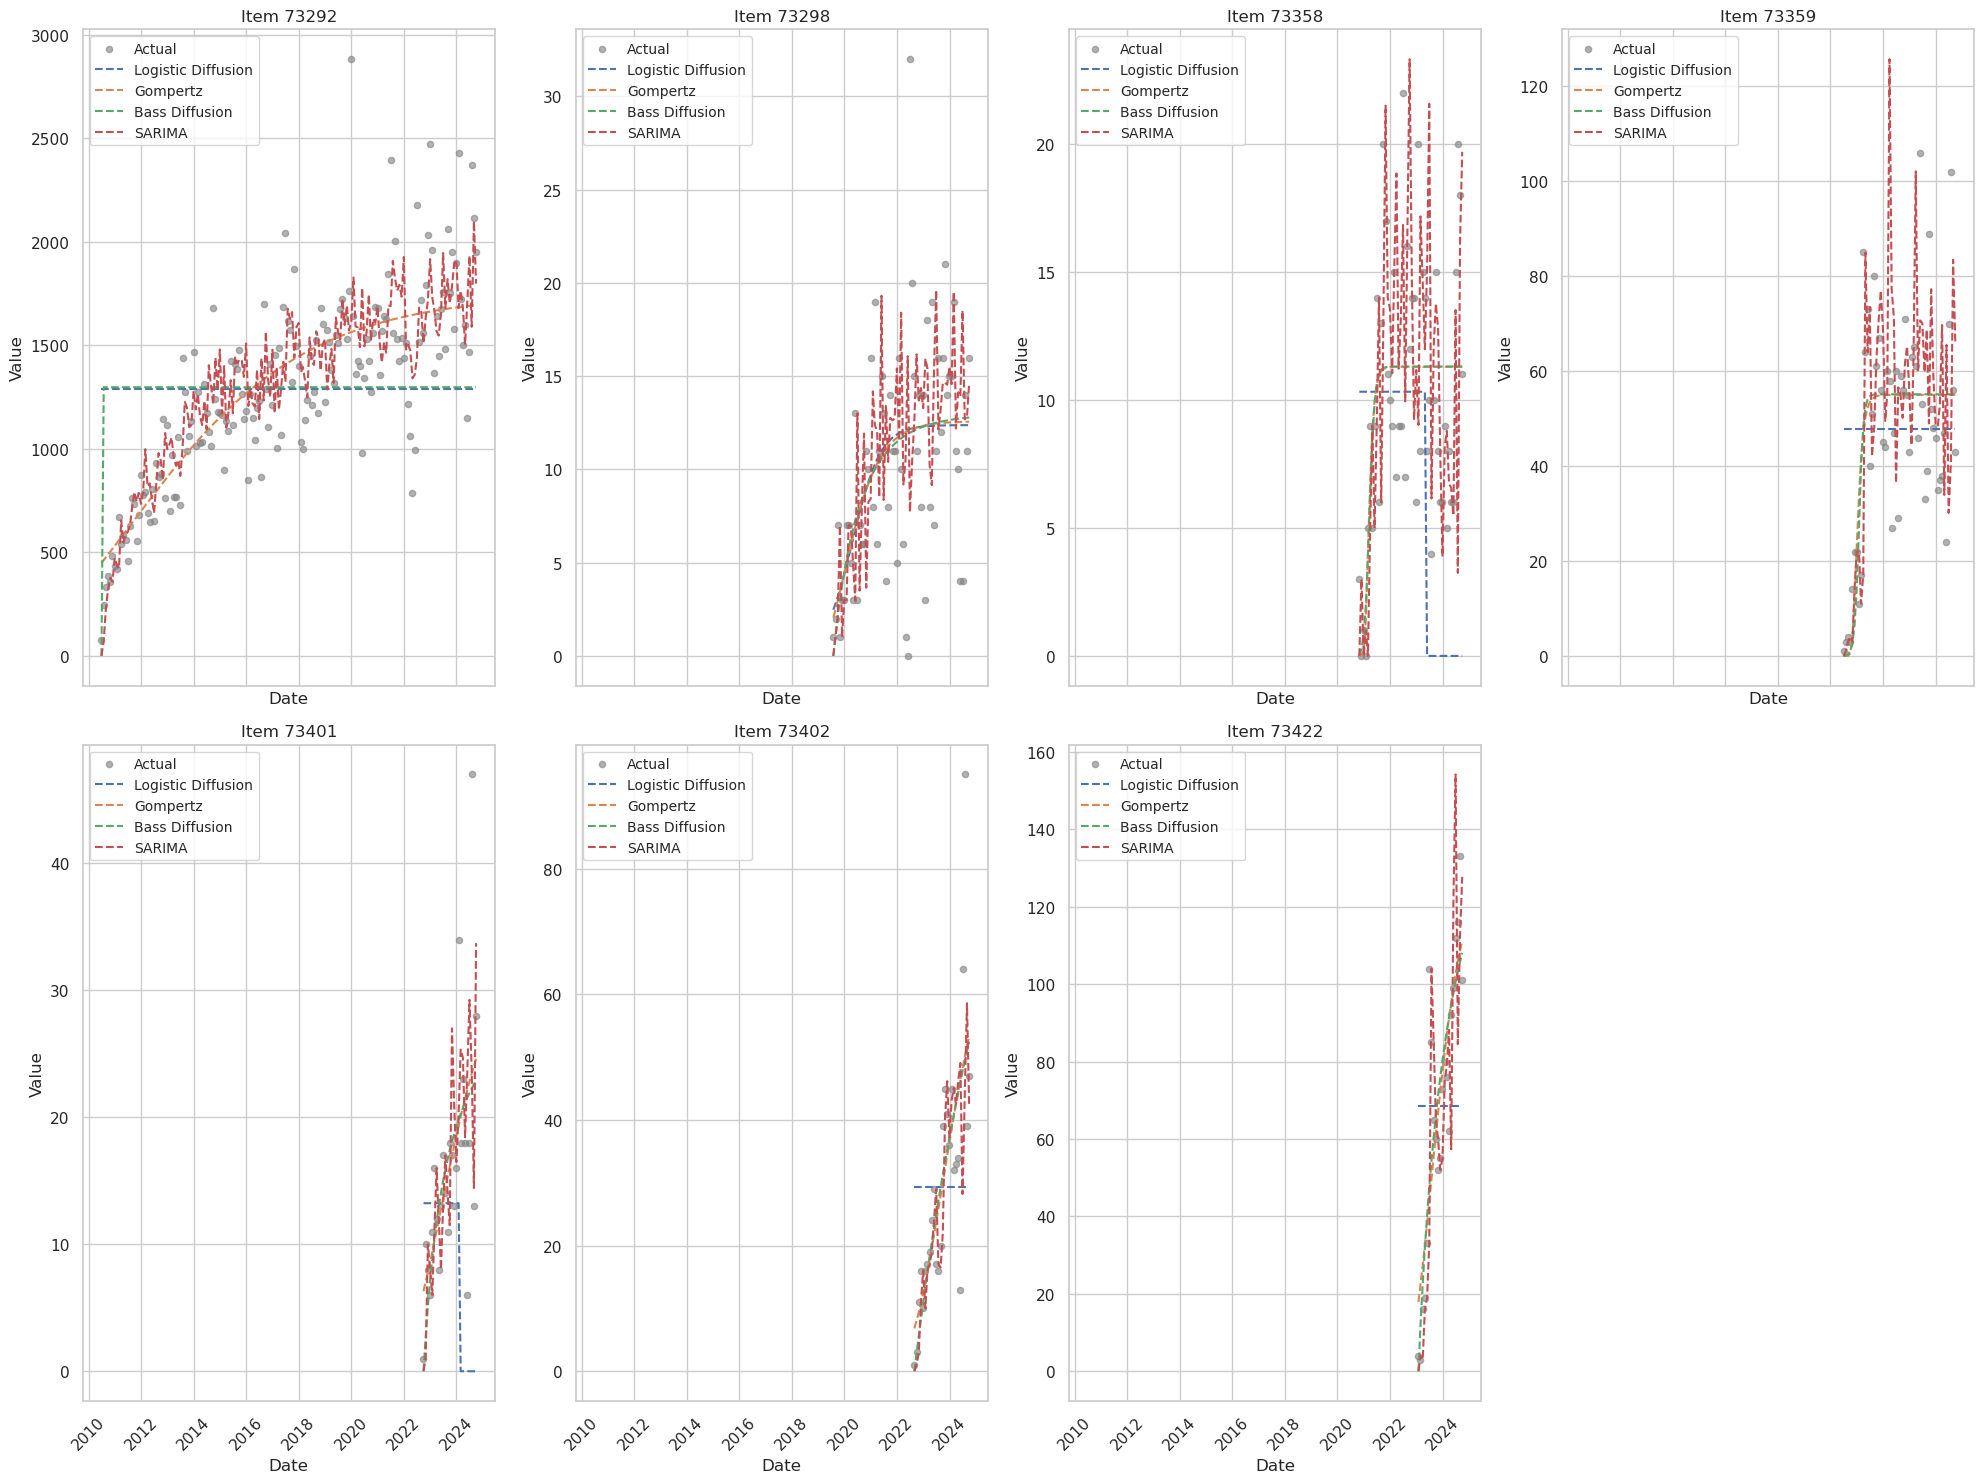

     Item               Model     r2     MAE      MAPE
0   73292  Logistic Diffusion   0.00  365.81      0.48
1   73292            Gompertz   0.64  197.30      0.19
2   73292      Bass Diffusion   0.04  359.14      0.39
3   73292              SARIMA   0.65  200.68      0.17
4   73298  Logistic Diffusion   0.25    3.98  8.68e+14
5   73298            Gompertz   0.25    3.97  8.62e+14
6   73298      Bass Diffusion   0.25    3.98  8.51e+14
7   73298              SARIMA  -0.22    4.96  1.15e+15
8   73358  Logistic Diffusion  -1.18    6.46  1.94e+15
9   73358            Gompertz   0.31    3.68  1.38e+14
10  73358      Bass Diffusion   0.31    3.69  2.18e+14
11  73358              SARIMA  -0.13    4.28  3.75e+14
12  73359  Logistic Diffusion   0.00   18.48      2.09
13  73359            Gompertz   0.45   13.24      0.40
14  73359      Bass Diffusion   0.46   13.24      0.39
15  73359              SARIMA  -0.22   20.01      0.48
16  73401  Logistic Diffusion  -1.51    9.99      1.01
17  73401 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []

# Plot settings
n_items = len(valid_items)
cols = 4
rows = int(np.ceil(n_items / cols))
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharex=True)
axes = axes.flatten()

# Iterate through each item and fit models
for i, item in enumerate(valid_items):
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue

    time_index = np.arange(len(item_data))
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }

    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = r2_score(item_data, predicted)
            mae = mean_absolute_error(item_data, predicted)
            mape = mean_absolute_percentage_error(item_data, predicted)

            results[model_name] = {
                'r2': r2, 'MAE': mae, 'MAPE': mape, 'predicted': predicted
            }
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = r2_score(item_data, sarima_pred)
        sarima_mae = mean_absolute_error(item_data, sarima_pred)
        sarima_mape = mean_absolute_percentage_error(item_data, sarima_pred)

        results["SARIMA"] = {
            'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape, 'predicted': sarima_pred
        }
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

    # Store results
    for model_name, metrics in results.items():
        model_results.append({
            'Item': item,
            'Model': model_name,
            'r2': metrics['r2'],
            'MAE': metrics['MAE'],
            'MAPE': metrics['MAPE']
        })

    # Plot the actual vs predicted values
    ax = axes[i]
    ax.scatter(item_data.index, item_data, label='Actual', color='gray', alpha=0.6, s=20)
    for model_name, metrics in results.items():
        ax.plot(item_data.index, metrics['predicted'], label=model_name, linestyle='--')
    ax.set_title(f'Item {item}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend(loc='upper left', fontsize='small')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Convert model results to DataFrame and format values
results_df = pd.DataFrame(model_results)

# Format values for display
for column in ['MAE', 'MAPE', 'r2']:
    results_df[column] = results_df[column].apply(lambda x: f"{x:.2e}" if x >= 100000 else f"{x:.2f}")

print(results_df)


/tmp/ipykernel_497/1895641759.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/1895641759.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/1895641759.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/1895641759.py:34: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/1895641759.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/1895641759.py:40: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/1895641759.py:40: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(

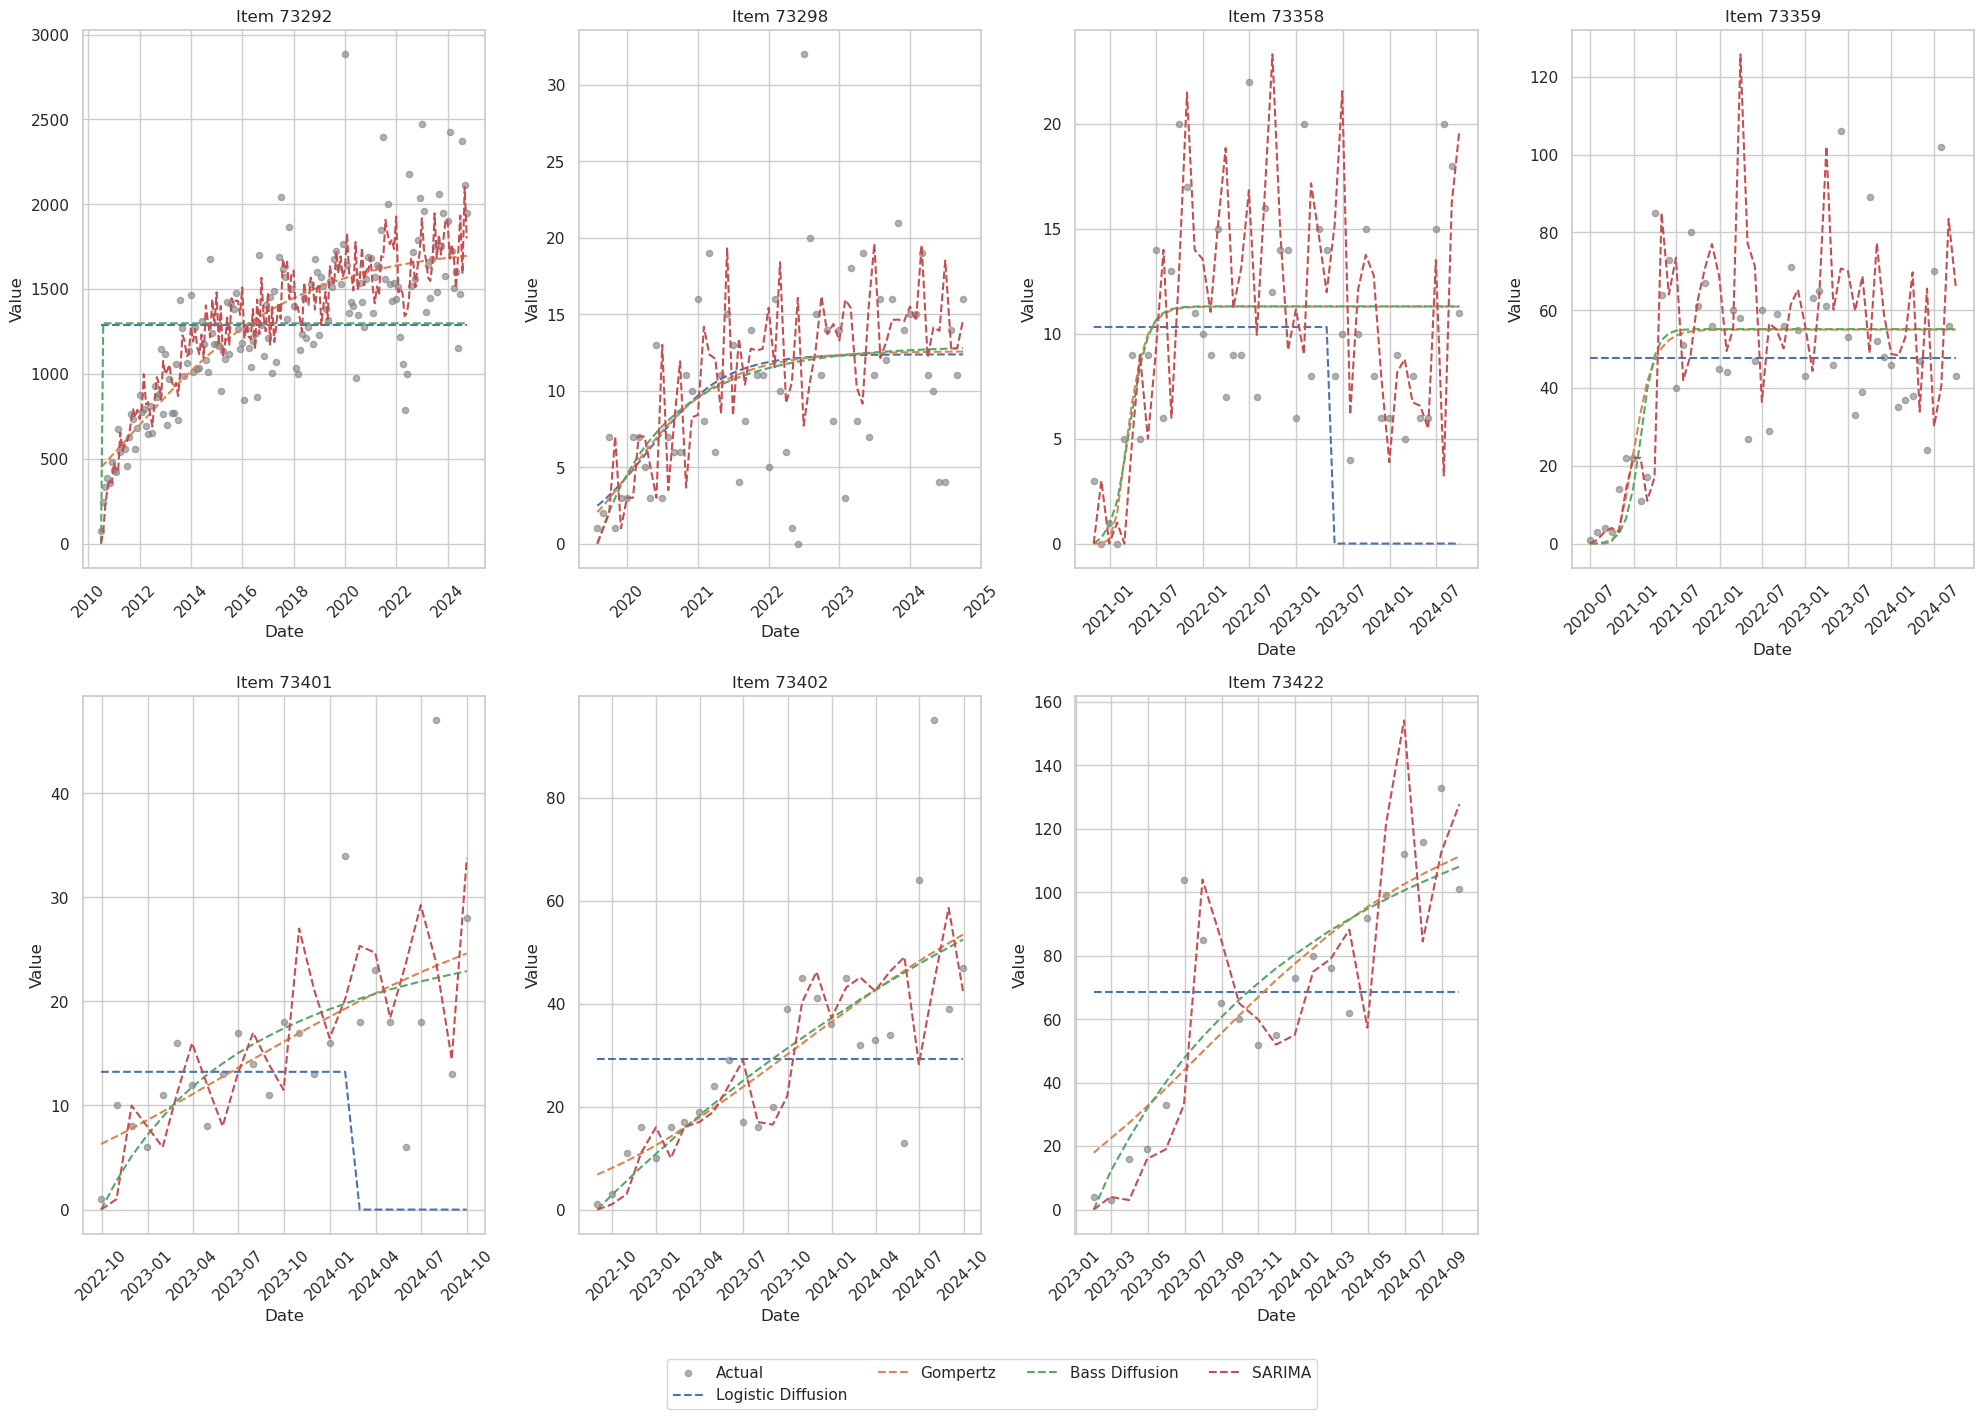

     Item               Model     r2     MAE      MAPE
0   73292  Logistic Diffusion   0.00  365.81      0.48
1   73292            Gompertz   0.64  197.30      0.19
2   73292      Bass Diffusion   0.04  359.14      0.39
3   73292              SARIMA   0.65  200.68      0.17
4   73298  Logistic Diffusion   0.25    3.98  8.68e+14
5   73298            Gompertz   0.25    3.97  8.62e+14
6   73298      Bass Diffusion   0.25    3.98  8.51e+14
7   73298              SARIMA  -0.22    4.96  1.15e+15
8   73358  Logistic Diffusion  -1.18    6.46  1.94e+15
9   73358            Gompertz   0.31    3.68  1.38e+14
10  73358      Bass Diffusion   0.31    3.69  2.18e+14
11  73358              SARIMA  -0.13    4.28  3.75e+14
12  73359  Logistic Diffusion   0.00   18.48      2.09
13  73359            Gompertz   0.45   13.24      0.40
14  73359      Bass Diffusion   0.46   13.24      0.39
15  73359              SARIMA  -0.22   20.01      0.48
16  73401  Logistic Diffusion  -1.51    9.99      1.01
17  73401 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []

# Plot settings
n_items = len(valid_items)
cols = 4
rows = int(np.ceil(n_items / cols))
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

# Iterate through each item and fit models
for i, item in enumerate(valid_items):
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue

    time_index = np.arange(len(item_data))
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }

    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = r2_score(item_data, predicted)
            mae = mean_absolute_error(item_data, predicted)
            mape = mean_absolute_percentage_error(item_data, predicted)

            results[model_name] = {
                'r2': r2, 'MAE': mae, 'MAPE': mape, 'predicted': predicted
            }
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = r2_score(item_data, sarima_pred)
        sarima_mae = mean_absolute_error(item_data, sarima_pred)
        sarima_mape = mean_absolute_percentage_error(item_data, sarima_pred)

        results["SARIMA"] = {
            'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape, 'predicted': sarima_pred
        }
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

    # Store results
    for model_name, metrics in results.items():
        model_results.append({
            'Item': item,
            'Model': model_name,
            'r2': metrics['r2'],
            'MAE': metrics['MAE'],
            'MAPE': metrics['MAPE']
        })

    # Plot the actual vs predicted values
    ax = axes[i]
    ax.scatter(item_data.index, item_data, label='Actual', color='gray', alpha=0.6, s=20)
    for model_name, metrics in results.items():
        ax.plot(item_data.index, metrics['predicted'], label=model_name, linestyle='--')
    ax.set_title(f'Item {item}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the entire plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

# Convert model results to DataFrame and format values
results_df = pd.DataFrame(model_results)

# Format values for display
for column in ['MAE', 'MAPE', 'r2']:
    results_df[column] = results_df[column].apply(lambda x: f"{x:.2e}" if x >= 100000 else f"{x:.2f}")

print(results_df)


/tmp/ipykernel_497/3279598902.py:77: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/3279598902.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/3279598902.py:77: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/3279598902.py:110: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start=item_data.index[0], periods=len(prediction_index), freq='M'),
/tmp/ipykernel_497/3279598902.py:34: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/3279598902.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/3279598902.py:40: RuntimeWarning: ov

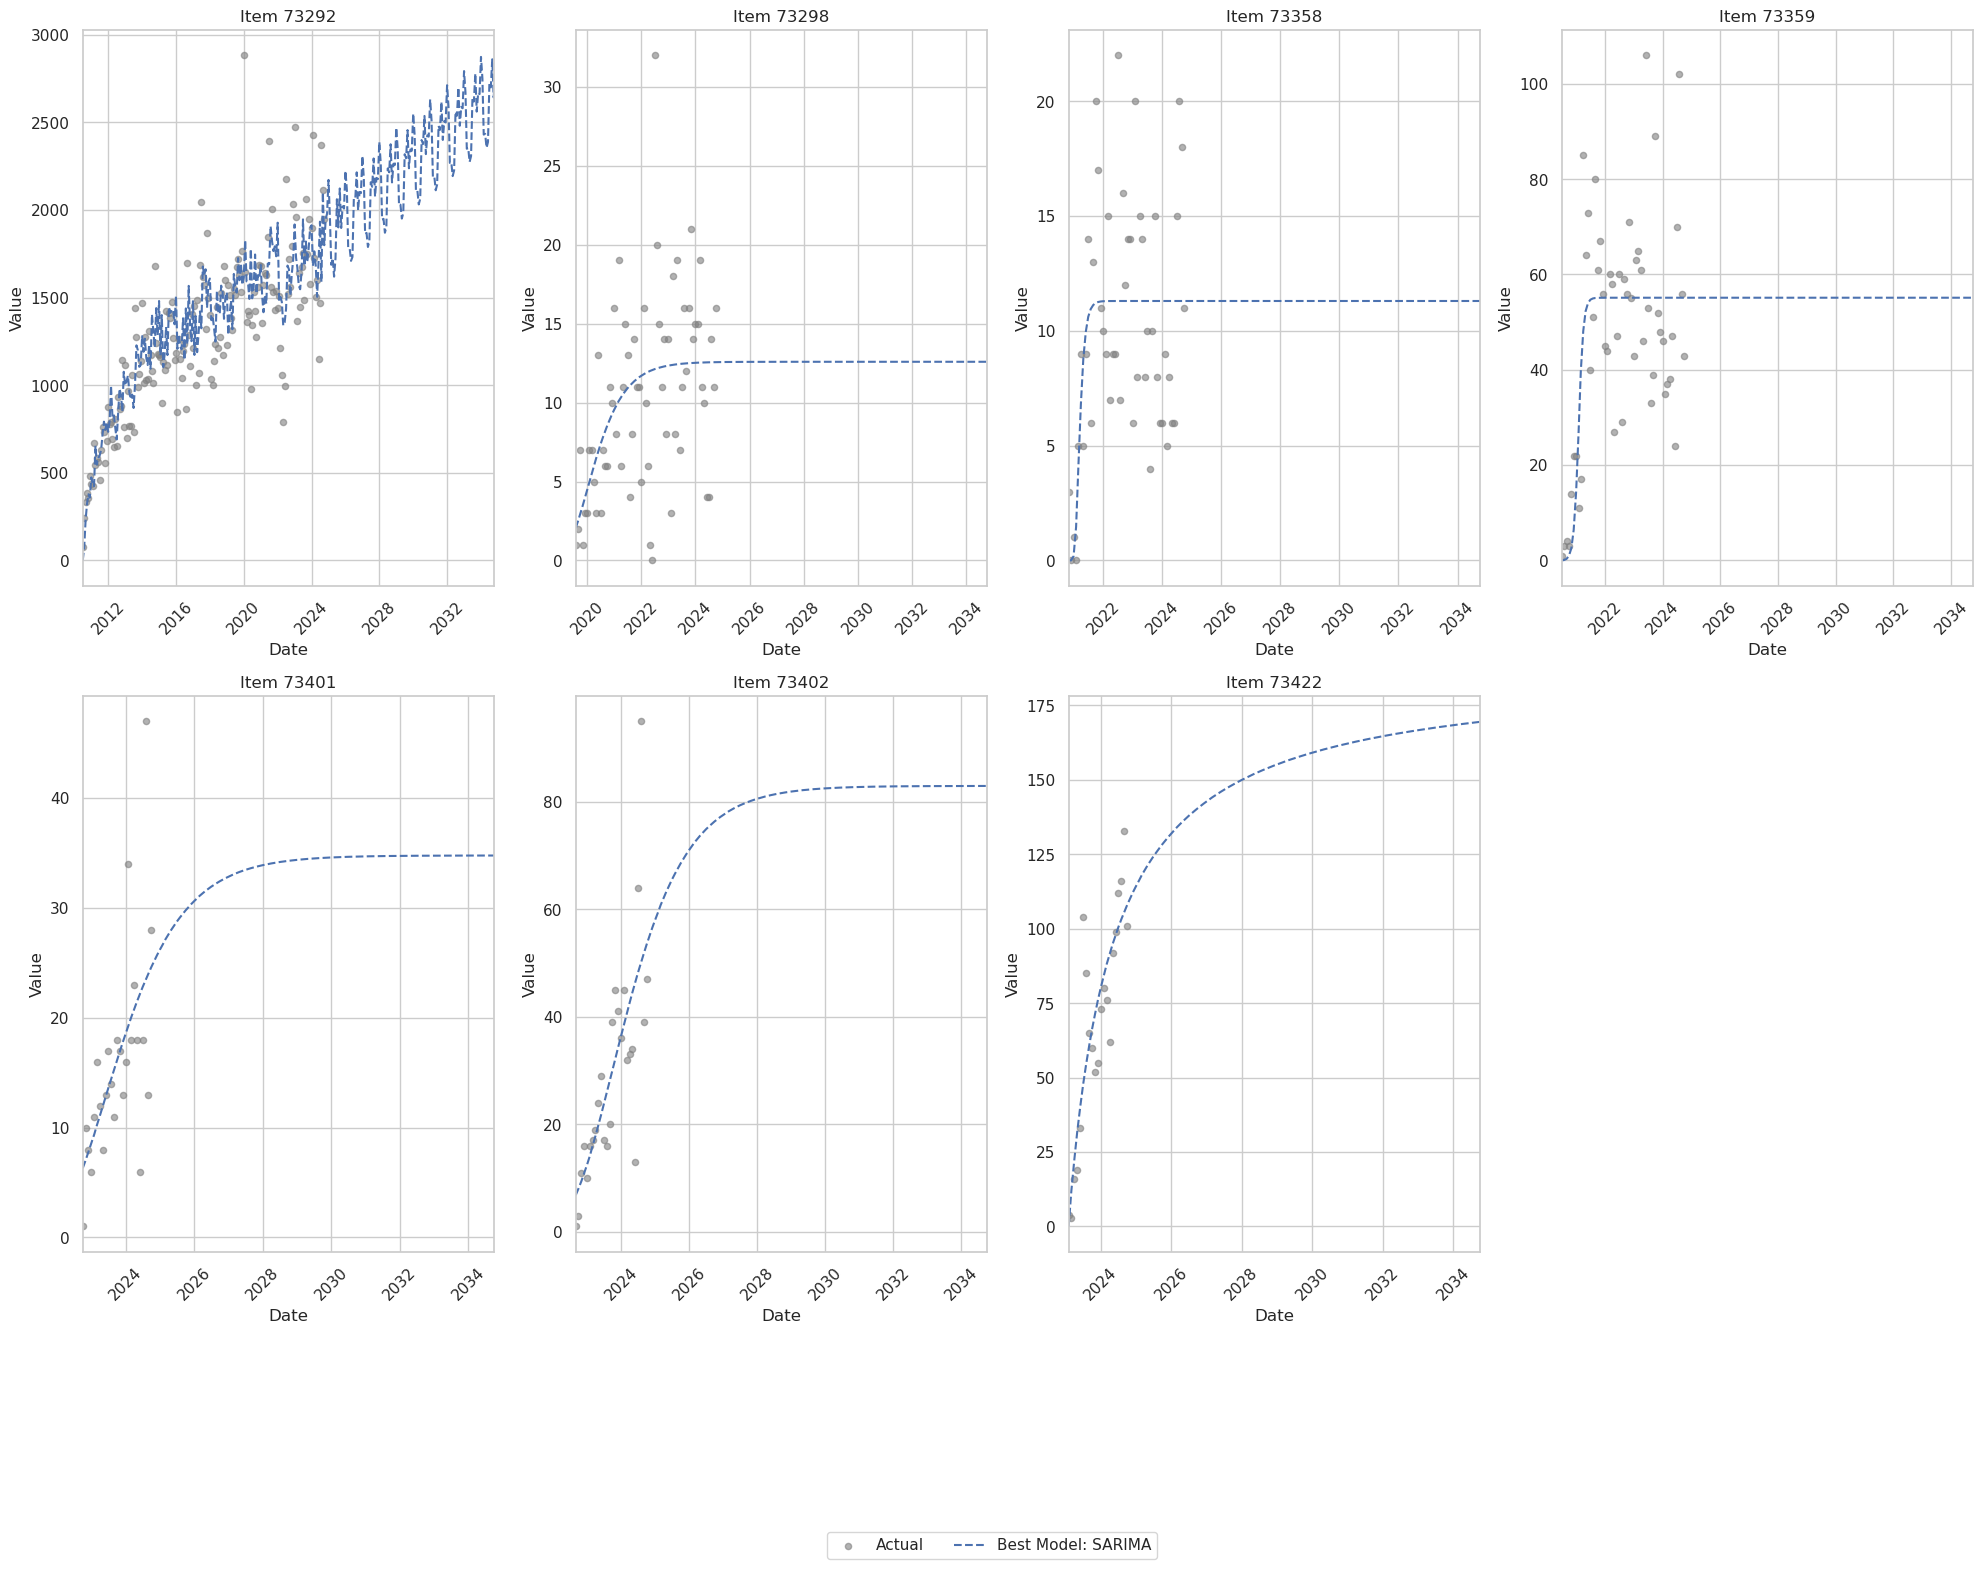

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []

# Prediction range
prediction_end = pd.Timestamp('2034-09-30')

# Plot settings
n_items = len(valid_items)
cols = 4
rows = int(np.ceil(n_items / cols))
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

# Iterate through each item and fit models
for i, item in enumerate(valid_items):
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue

    time_index = np.arange(len(item_data))
    prediction_index = np.arange(len(item_data) + (prediction_end - item_data.index[-1]).days // 30 + 1)
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }

    best_model_name = None
    best_model_metrics = {'r2': -np.inf}  # Initialize with the worst r2 value
    best_model_predicted = None

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            future_predicted = model_func(prediction_index, *params)
            r2 = r2_score(item_data, predicted)

            if r2 > best_model_metrics['r2']:
                best_model_name = model_name
                best_model_metrics = {'r2': r2}
                best_model_predicted = future_predicted
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        future_sarima_pred = sarima_fit.get_forecast(steps=len(prediction_index) - len(time_index)).predicted_mean
        future_predicted_sarima = np.concatenate([sarima_pred, future_sarima_pred])

        sarima_r2 = r2_score(item_data, sarima_pred)

        if sarima_r2 > best_model_metrics['r2']:
            best_model_name = "SARIMA"
            best_model_metrics = {'r2': sarima_r2}
            best_model_predicted = future_predicted_sarima
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

    # Plot the actual vs predicted values
    ax = axes[i]
    ax.scatter(item_data.index, item_data, label='Actual', color='gray', alpha=0.6, s=20)
    ax.plot(
        pd.date_range(start=item_data.index[0], periods=len(prediction_index), freq='M'),
        best_model_predicted,
        label=f'Best Model: {best_model_name}',
        linestyle='--'
    )
    ax.set_title(f'Item {item}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim([item_data.index[0], prediction_end])

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the entire plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


/tmp/ipykernel_497/2682392981.py:65: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/2682392981.py:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/2682392981.py:33: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/2682392981.py:39: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/2682392981.py:39: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/2682392981.py:39: RuntimeWarning: overflow encountered in multiply
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/2682392981.py:104: OptimizeWarning: Covariance of the parameters 

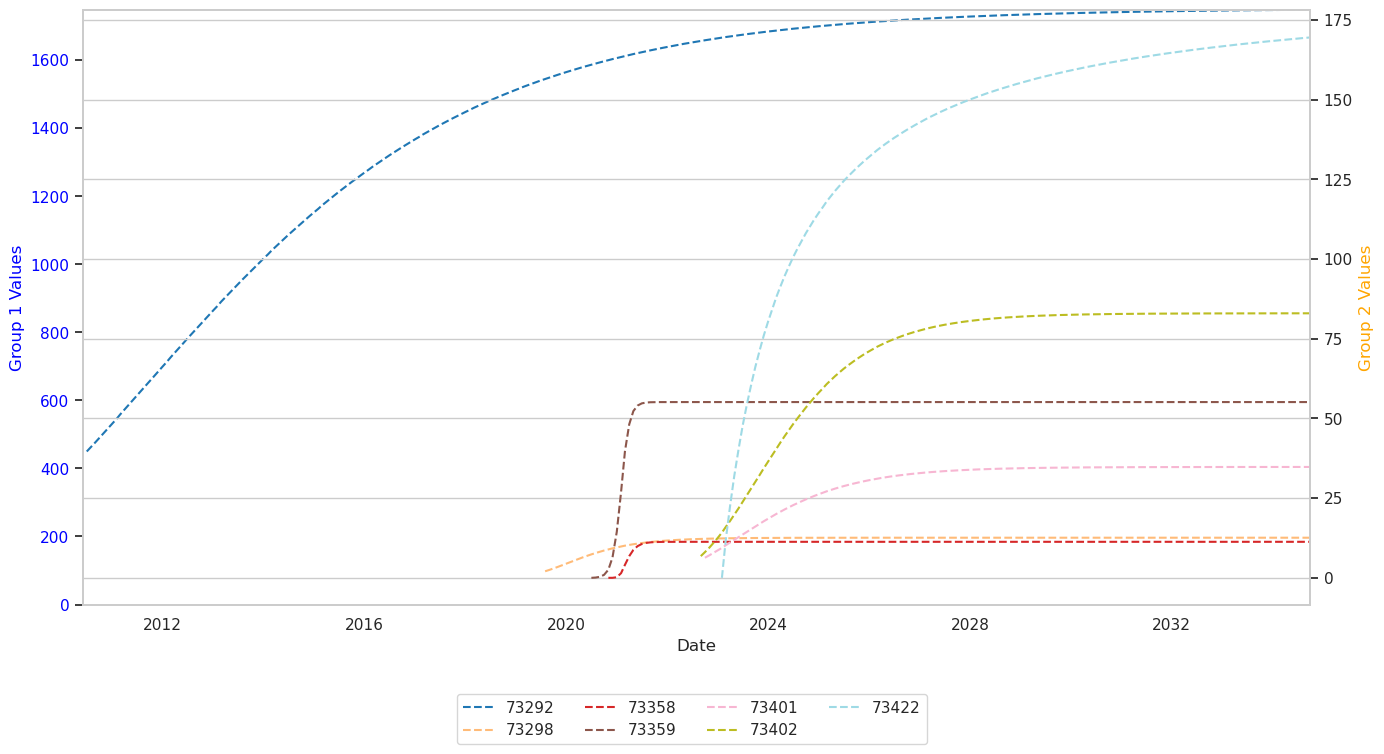

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []

# Prediction range
prediction_end = pd.Timestamp('2034-09-30')

# Separate items into two groups
group1 = ['73292']
group2 = [item for item in valid_items if item not in group1]

# Determine common x and y axis ranges
common_x_start = filtered_data.index.min()
common_x_end = prediction_end

# Get future predictions to include in y-axis range
def calculate_future_range(data, models):
    all_values = data['Value'].tolist()
    for item in valid_items:
        item_data = data[data['Item'] == item]['Value'].resample('ME').sum().dropna()
        if not item_data.empty:
            time_index = np.arange(len(item_data))
            prediction_index = np.arange(len(item_data) + (prediction_end - item_data.index[-1]).days // 30 + 1)
            for model_name, model_func in models.items():
                try:
                    params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
                    future_predicted = model_func(prediction_index, *params)
                    all_values.extend(future_predicted)
                except Exception:
                    continue
    return min(all_values), max(all_values)

models = {
    "Logistic Diffusion": logistic_diffusion,
    "Gompertz": gompertz,
    "Bass Diffusion": bass_diffusion
}
common_y_min, common_y_max = calculate_future_range(filtered_data, models)

# Plot settings
fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(valid_items)))
color_mapping = dict(zip(valid_items, colors))

# Storage for legend entries
legend_handles = []

# Iterate through each group and fit models
for group, axis in [(group1, ax), (group2, ax.twinx())]:
    for item in group:
        item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

        if item_data.empty:
            print(f"Item {item} has no data after resampling. Skipping.")
            continue

        time_index = np.arange(len(item_data))
        prediction_index = np.arange(len(item_data) + (prediction_end - item_data.index[-1]).days // 30 + 1)
        best_model_name = None
        best_model_metrics = {'r2': -np.inf}  # Initialize with the worst r2 value
        best_model_predicted = None

        for model_name, model_func in models.items():
            try:
                params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
                predicted = model_func(time_index, *params)
                future_predicted = model_func(prediction_index, *params)
                r2 = r2_score(item_data, predicted)

                if r2 > best_model_metrics['r2']:
                    best_model_name = model_name
                    best_model_metrics = {'r2': r2}
                    best_model_predicted = future_predicted
            except Exception as e:
                print(f"Error fitting {model_name} for item {item}: {e}")

        # Plot the actual vs predicted values
        axis.plot(
            pd.date_range(start=item_data.index[0], periods=len(prediction_index), freq='M'),
            best_model_predicted,
            label=f'{item} Best Model: {best_model_name}',
            linestyle='--', color=color_mapping[item]
        )

        # Store legend handles
        legend_handles.append(plt.Line2D([], [], color=color_mapping[item], linestyle='--', label=f'{item}'))

# Set common limits and labels
ax.set_xlim([common_x_start, common_x_end])
ax.set_ylim([common_y_min, common_y_max])
ax.set_xlabel('Date')
ax.set_ylabel('Group 1 Values', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()
ax2.set_ylim([common_y_min, common_y_max])
ax2.set_ylabel('Group 2 Values', color='orange', labelpad=35)  # Move secondary axis label rightward
ax2.tick_params(axis='y', labelcolor='orange')
ax2.yaxis.set_ticks([])  # Remove secondary axis tick labels entirely

# Remove all gridlines explicitly
ax.grid(False, which='both')
ax2.grid(False, which='both')

# Add one legend for the entire plot
fig.legend(handles=legend_handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()


/tmp/ipykernel_497/274851013.py:64: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/274851013.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/274851013.py:64: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/274851013.py:34: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/274851013.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/274851013.py:40: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/274851013.py:40: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(p + q) 

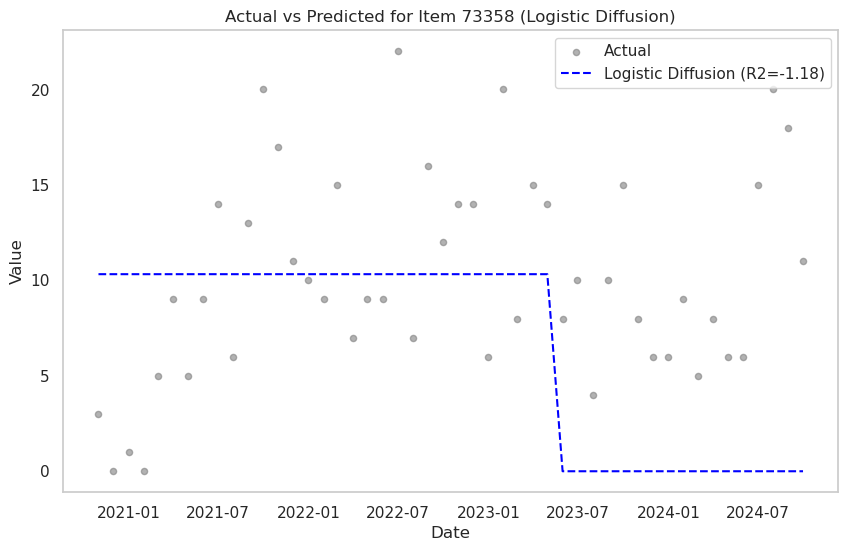

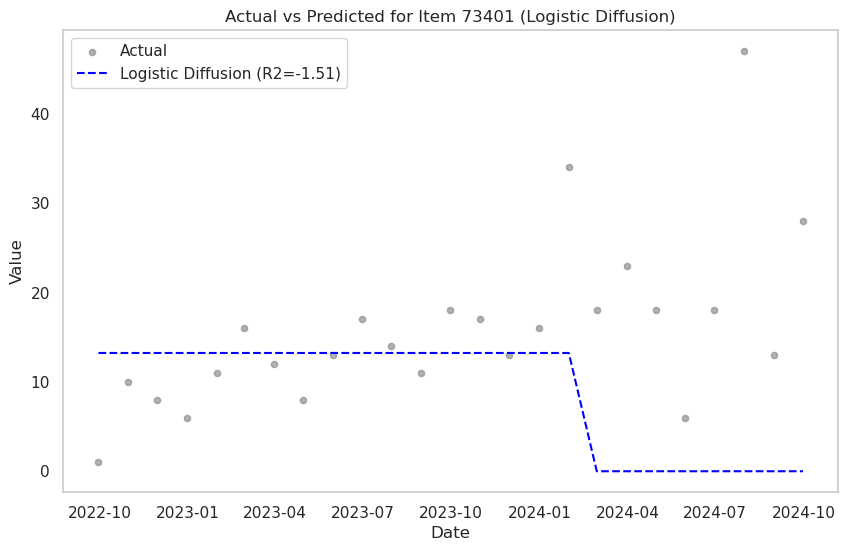

All Results:
     Item               Model            r2         MAE          MAPE
0   73292  Logistic Diffusion  0.000000e+00  365.808140  4.760472e-01
1   73292            Gompertz  6.449168e-01  197.298238  1.888531e-01
2   73292      Bass Diffusion  3.968492e-02  359.144431  3.909869e-01
3   73292              SARIMA  6.516021e-01  200.682901  1.700874e-01
4   73298  Logistic Diffusion  2.481823e-01    3.984120  8.680004e+14
5   73298            Gompertz  2.498361e-01    3.971439  8.624989e+14
6   73298      Bass Diffusion  2.479266e-01    3.980553  8.506362e+14
7   73298              SARIMA -2.225046e-01    4.957118  1.148814e+15
8   73358  Logistic Diffusion -1.184516e+00    6.457661  1.937032e+15
9   73358            Gompertz  3.083566e-01    3.677738  1.375076e+14
10  73358      Bass Diffusion  3.075977e-01    3.685599  2.177095e+14
11  73358              SARIMA -1.252603e-01    4.280370  3.752894e+14
12  73359  Logistic Diffusion  0.000000e+00   18.480769  2.085595e+00
13  733

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []
problematic_items = []

# Iterate through each item and fit models
for item in valid_items:
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue

    time_index = np.arange(len(item_data))
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }

    for model_name, model_func in models.items():
        try:
            # Fit the model
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = 1 - np.sum((item_data - predicted) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)

            # Store results
            model_results.append({
                'Item': item,
                'Model': model_name,
                'r2': r2,
                'MAE': mean_absolute_error(item_data, predicted),
                'MAPE': mean_absolute_percentage_error(item_data, predicted)
            })

            # Check for problematic R²
            if r2 < -1 or r2 > 1:
                problematic_items.append({
                    'Item': item,
                    'Model': model_name,
                    'R2': r2
                })
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = 1 - np.sum((item_data - sarima_pred) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)

        model_results.append({
            'Item': item,
            'Model': "SARIMA",
            'r2': sarima_r2,
            'MAE': mean_absolute_error(item_data, sarima_pred),
            'MAPE': mean_absolute_percentage_error(item_data, sarima_pred)
        })

        if sarima_r2 < -1 or sarima_r2 > 1:
            problematic_items.append({
                'Item': item,
                'Model': "SARIMA",
                'R2': sarima_r2
            })
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(model_results)
problematic_df = pd.DataFrame(problematic_items)

# Plot actual vs predicted for problematic items
for _, row in problematic_df.iterrows():
    item = row['Item']
    model_name = row['Model']

    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()
    time_index = np.arange(len(item_data))

    if model_name == "Logistic Diffusion":
        model_func = logistic_diffusion
    elif model_name == "Gompertz":
        model_func = gompertz
    elif model_name == "Bass Diffusion":
        model_func = bass_diffusion
    elif model_name == "SARIMA":
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        predicted = sarima_fit.fittedvalues
    else:
        continue

    if model_name != "SARIMA":
        params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
        predicted = model_func(time_index, *params)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(item_data.index, item_data, label='Actual', color='gray', alpha=0.6, s=20)
    plt.plot(item_data.index, predicted, label=f'{model_name} (R2={row["R2"]:.2f})', linestyle='--', color='blue')
    plt.title(f'Actual vs Predicted for Item {item} ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# Output tables
print("All Results:")
print(results_df)

print("\nProblematic R2 Values:")
print(problematic_df)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []
problematic_items = []

# Iterate through each item and fit models
for item in valid_items:
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()

    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue

    time_index = np.arange(len(item_data))
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }

    for model_name, model_func in models.items():
        try:
            # Fit the model
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = 1 - np.sum((item_data - predicted) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)

            # Store results
            model_results.append({
                'Item': item,
                'Model': model_name,
                'r2': r2,
                'MAE': mean_absolute_error(item_data, predicted),
                'MAPE': mean_absolute_percentage_error(item_data, predicted)
            })

            # Check for problematic R²
            if r2 < -1 or r2 > 1:
                problematic_items.append({
                    'Item': item,
                    'Model': model_name,
                    'R2': r2
                })
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = 1 - np.sum((item_data - sarima_pred) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)

        model_results.append({
            'Item': item,
            'Model': "SARIMA",
            'r2': sarima_r2,
            'MAE': mean_absolute_error(item_data, sarima_pred),
            'MAPE': mean_absolute_percentage_error(item_data, sarima_pred)
        })

        if sarima_r2 < -1 or sarima_r2 > 1:
            problematic_items.append({
                'Item': item,
                'Model': "SARIMA",
                'R2': sarima_r2
            })
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(model_results)
problematic_df = pd.DataFrame(problematic_items)

# Identify best models for each item
best_models = results_df.loc[results_df.groupby('Item')['r2'].idxmax()]

# Output best models
print("Best Models for Each Item:")
print(best_models)

# Analyze diffusion model performance
diffusion_models = results_df[results_df['Model'].isin(["Logistic Diffusion", "Gompertz", "Bass Diffusion"])]
diffusion_performance = diffusion_models.groupby('Item')['r2'].idxmax().apply(lambda idx: diffusion_models.loc[idx])

print("\nDiffusion Model Analysis:")
for _, row in diffusion_performance.iterrows():
    print(f"Item {row['Item']}: Best Diffusion Model = {row['Model']} (R2 = {row['r2']:.2f})")
    if row['Model'] == "Logistic Diffusion":
        print("  - Indicates balanced growth with symmetric adoption.")
    elif row['Model'] == "Gompertz":
        print("  - Suggests gradual early adoption with rapid growth later.")
    elif row['Model'] == "Bass Diffusion":
        print("  - Reflects interplay of innovation and imitation in adoption.")


/tmp/ipykernel_497/1672951322.py:64: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/1672951322.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/1672951322.py:64: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_497/1672951322.py:34: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_497/1672951322.py:37: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_497/1672951322.py:40: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_497/1672951322.py:40: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(

Best Models for Each Item:
     Item           Model        r2         MAE          MAPE
3   73292          SARIMA  0.651602  200.682901  1.700874e-01
5   73298        Gompertz  0.249836    3.971439  8.624989e+14
9   73358        Gompertz  0.308357    3.677738  1.375076e+14
14  73359  Bass Diffusion  0.461688   13.238131  3.935034e-01
17  73401        Gompertz  0.372714    4.890730  5.466356e-01
21  73402        Gompertz  0.554481    9.127926  6.052224e-01
26  73422  Bass Diffusion  0.732352   13.954237  4.017249e-01

Diffusion Model Analysis:
Item 73292: Best Diffusion Model = Gompertz (R2 = 0.64)
  - Suggests gradual early adoption with rapid growth later.
Item 73298: Best Diffusion Model = Gompertz (R2 = 0.25)
  - Suggests gradual early adoption with rapid growth later.
Item 73358: Best Diffusion Model = Gompertz (R2 = 0.31)
  - Suggests gradual early adoption with rapid growth later.
Item 73359: Best Diffusion Model = Bass Diffusion (R2 = 0.46)
  - Reflects interplay of innovation 

/home/doughnut/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# -- Create two new virtual “Item” groups --

# 1) Combine items 73358 and 73359
combined_73358_59 = (
    filtered_data[filtered_data['Item'].isin(['73358', '73359'])]
    .groupby('Month')['Value'].sum()
    .reset_index()
)
combined_73358_59['Item'] = '73358-73359-Combined'

# 2) Combine items 73358, 73359, 73298, 73401, 73402, 73422
combined_73358_59_plus = (
    filtered_data[filtered_data['Item'].isin(['73358', '73359', '73298', '73401', '73402', '73422'])]
    .groupby('Month')['Value'].sum()
    .reset_index()
)
combined_73358_59_plus['Item'] = '73358-73359-73298-73401-73402-73422-Combined'

# Now append these combined items back to the filtered data
filtered_data = pd.concat(
    [
        filtered_data.reset_index(),       # Original data
        combined_73358_59,                 # 73358+73359
        combined_73358_59_plus            # 73358+73359+73298+73401+73402+73422
    ],
    ignore_index=True
)

# Re-set index to Month
filtered_data.set_index('Month', inplace=True)

# Drop categories with no data
data_counts = filtered_data.groupby('Item')['Value'].count()
valid_items = data_counts[data_counts > 0].index.tolist()
filtered_data = filtered_data[filtered_data['Item'].isin(valid_items)]

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Initialize dictionaries for results
model_results = []
problematic_items = []

# Iterate through each item and fit models
for item in valid_items:
    # Resample by month-end, sum, and drop missing
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum().dropna()
    
    if item_data.empty:
        print(f"Item {item} has no data after resampling. Skipping.")
        continue
    
    time_index = np.arange(len(item_data))
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    
    for model_name, model_func in models.items():
        try:
            # Fit the model
            params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = 1 - np.sum((item_data - predicted) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)
            
            # Store results
            model_results.append({
                'Item': item,
                'Model': model_name,
                'r2': r2,
                'MAE': mean_absolute_error(item_data, predicted),
                'MAPE': mean_absolute_percentage_error(item_data, predicted)
            })
            
            # Check for problematic R²
            if r2 < -1 or r2 > 1:
                problematic_items.append({
                    'Item': item,
                    'Model': model_name,
                    'R2': r2
                })
        except Exception as e:
            print(f"Error fitting {model_name} for item {item}: {e}")
    
    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(item_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = 1 - np.sum((item_data - sarima_pred) ** 2) / np.sum((item_data - np.mean(item_data)) ** 2)
        
        model_results.append({
            'Item': item,
            'Model': "SARIMA",
            'r2': sarima_r2,
            'MAE': mean_absolute_error(item_data, sarima_pred),
            'MAPE': mean_absolute_percentage_error(item_data, sarima_pred)
        })
        
        if sarima_r2 < -1 or sarima_r2 > 1:
            problematic_items.append({
                'Item': item,
                'Model': "SARIMA",
                'R2': sarima_r2
            })
    except Exception as e:
        print(f"Error fitting SARIMA for item {item}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(model_results)
problematic_df = pd.DataFrame(problematic_items)

# Identify best models for each item
best_models = results_df.loc[results_df.groupby('Item')['r2'].idxmax()]

# Output best models
print("Best Models for Each Item:")
print(best_models)

# Analyze diffusion model performance
diffusion_models = results_df[results_df['Model'].isin(["Logistic Diffusion", "Gompertz", "Bass Diffusion"])]
diffusion_performance = diffusion_models.groupby('Item')['r2'].idxmax().apply(lambda idx: diffusion_models.loc[idx])

print("\nDiffusion Model Analysis:")
for _, row in diffusion_performance.iterrows():
    print(f"Item {row['Item']}: Best Diffusion Model = {row['Model']} (R2 = {row['r2']:.2f})")
    if row['Model'] == "Logistic Diffusion":
        print("  - Indicates balanced growth with symmetric adoption.")
    elif row['Model'] == "Gompertz":
        print("  - Suggests gradual early adoption with rapid growth later.")
    elif row['Model'] == "Bass Diffusion":
        print("  - Reflects interplay of innovation and imitation in adoption.")


/tmp/ipykernel_507/4030458855.py:96: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_507/4030458855.py:68: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_507/4030458855.py:96: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(model_func, time_index, item_data, maxfev=10000)
/tmp/ipykernel_507/4030458855.py:65: RuntimeWarning: overflow encountered in exp
  return K / (1 + np.exp(-r * (t - t0)))
/tmp/ipykernel_507/4030458855.py:68: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * np.exp(-c * t))
/tmp/ipykernel_507/4030458855.py:71: RuntimeWarning: overflow encountered in exp
  return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
/tmp/ipykernel_507/4030458855.py:71: RuntimeWarning: invalid value encountered in divide
  return M * (1 - np.exp(-(

Best Models for Each Item:
                                            Item           Model        r2  \
3                                          73292          SARIMA  0.651602   
5                                          73298        Gompertz  0.249836   
9                                          73358        Gompertz  0.308357   
14  73358-73359-73298-73401-73402-73422-Combined  Bass Diffusion  0.860312   
18                          73358-73359-Combined  Bass Diffusion  0.522981   
22                                         73359  Bass Diffusion  0.461688   
25                                         73401        Gompertz  0.372714   
29                                         73402        Gompertz  0.554481   
34                                         73422  Bass Diffusion  0.732352   

           MAE          MAPE  
3   200.682901  1.700874e-01  
5     3.971439  8.624989e+14  
9     3.677738  1.375076e+14  
14   21.685289  5.769017e-01  
18   15.394483  3.876887e-01  
22   1

/home/doughnut/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
